# 先生成一系列数据

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_range = np.linspace(0,20,10)
y_range = np.linspace(40,60,10)
z_range = np.linspace(10,60,10)
w_range = np.linspace(0,10,10)
# 生成自变量网格
x_grid, y_grid, z_grid, w_grid = np.meshgrid(x_range, y_range, z_range, w_range)


In [4]:
# 定义一个多变量函数
def fun(x,y,z,w):
    return -5*x + (y-50)**2 + 100*np.sin((z-10)/12) + (w**3)/10 + 20

In [5]:
# 计算每个自变量组合对应的因变量值
result_grid = fun(x_grid, y_grid, z_grid, w_grid)

In [8]:
# 生成三维散点图
def draw_3d(ax1='x',ax2='y'): 
    x,y = None,None
    if ax1=='x':
        x = x_grid
    elif ax1=='y':
        x = y_grid
    elif ax1=='z':
        x = z_grid
    elif ax1=='w':
        x = w_grid
    # 
    if ax2=='y':
        y = y_grid
    elif ax2=='z':
        y = z_grid
    elif ax2=='w':
        y = w_grid
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, result_grid, c=result_grid, cmap='viridis')
    ax.set_xlabel(ax1)
    ax.set_ylabel(ax2)
    ax.set_zlabel('Result')
    plt.title('Multi-Variable Relationship')
    plt.show()

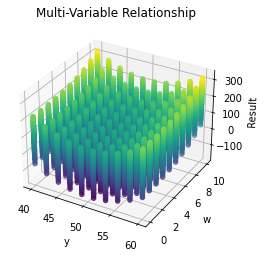

In [15]:
draw_3d('y','w')

In [ ]:
# 生成格式化数据

In [22]:
max_va = 0
min_va = 999
for i in result_grid:
    for j in i:
        for k in j:
            for m in k:
                max_va = m if m>max_va else max_va
                min_va = m if m<min_va else min_va

In [23]:
max_va

318.3500415432309

In [24]:
min_va

-164.2406928226494

In [25]:
data_list = []

In [26]:
for i in x_range:
    for j in y_range:
        for k in z_range:
            for m in w_range:
                data_list.append([i,j,k,m,fun(i,j,k,m)])

In [29]:
len(data_list)

10000

# 标准化数据

In [35]:
data_list = np.array(data_list)

In [38]:
data = data_list[:,:4]
label = data_list[:,-1]

In [52]:
# 归一化
# 对每列进行标准化
normalized_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
normalized_label= (label - label.min()) / (label.max() - label.min())

In [53]:
normalized_data[:,0].max()

1.0

# 使用GAN进行生成数据

In [54]:
import torch
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim